# CSO QaQc: Alaska Exploration

Here's where I explore a domain in Alaska to get a feel for the CSO data there. This is in the hopes to eventually compare the data there to some form of Climatalogy or other snow modelling tool. (Particularily C-SNOW which Nina had sent me a link to)

C-SNOW: https://ees.kuleuven.be/project/c-snow/

In [1]:
import requests
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import folium

# Import necessary packages, may need more or less as I go.

In [2]:
CSO_AL = gpd.read_file('CSO_AL.geojson')
CSO_AL['timestamp'] = pd.to_datetime(CSO_AL.timestamp)
CSO_AL['flags'] = False
CSO_AL

,id,author,depth,source,timestamp,elevation,geometry,flags
0,kUEn0QAu,Tully LaBelle-Hamer,44.000000,SnowPilot,2016-11-27 02:11:33+00:00,887.579956,POINT (-149.18541 60.76332),False
1,ntTyn4to,Tully LaBelle-Hamer,35.000000,SnowPilot,2016-12-04 00:43:14+00:00,706.499512,POINT (-149.18781 60.76411),False
2,6RjAtewN,Eric Geisler,108.000000,SnowPilot,2017-01-23 05:55:58+00:00,699.366577,POINT (-149.43802 60.68470),False
3,XJt9Rv2N,Joseph Kurtak,165.000000,SnowPilot,2017-01-24 07:51:04+00:00,713.650757,POINT (-149.43286 60.68269),False
4,PFF0tx0k,Joseph Kurtak,165.000000,SnowPilot,2017-01-24 07:51:18+00:00,713.650757,POINT (-149.43286 60.68269),False
...,...,...,...,...,...,...,...,...
1340,mHxyj/1g,Joseph Kurtak,104.999996,MountainHub,2020-02-27 19:39:51.181999+00:00,373.305969,POINT (-149.47248 60.67653),False
1341,pNIGyuBz,Henry Munter,500.000000,SnowPilot,2020-02-28 20:00:00+00:00,697.370850,POINT (-149.11024 60.68881),False
1342,GOdT7bJp,Eric Roberts,285.000000,SnowPilot,2020-02-28 23:30:00+00:00,562.470947,POINT (-149.15773 60.78556),False
1343,c43cn8+7,Henry Munter,169.000000,SnowPilot,2020-02-29 19:15:00+00:00,967.541260,POINT (-148.71820 60.92633),False


The domain that I've created comes from Alaska and extends a bit into Canada with coordinates:

`Lattitude range`: (67.5) - (50)

`Longitude range`: (-135) - (-165)

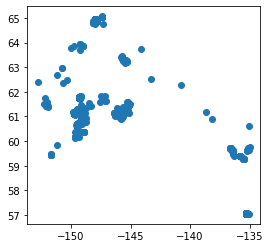

In [3]:
CSO_AL.plot();

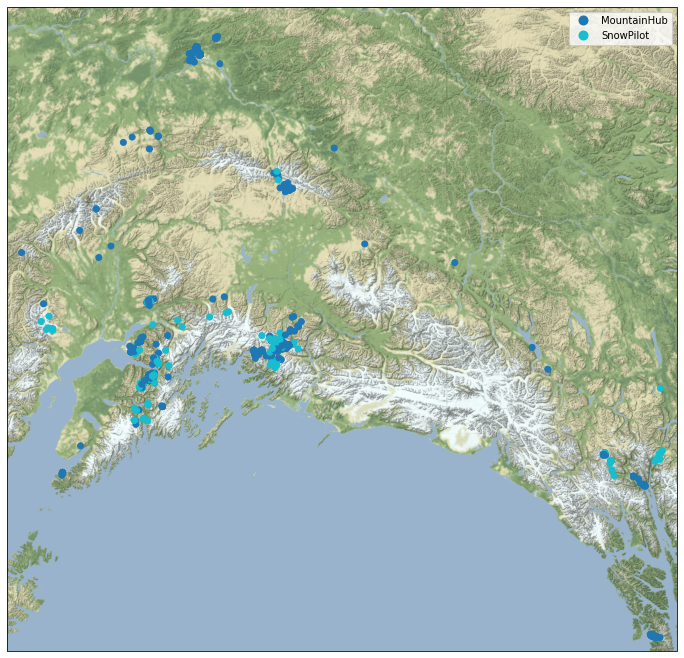

In [4]:
bnd = CSO_AL.geometry.bounds
stamen_terrain = cimgt.Stamen('terrain-background')
dx, dy = 0.4, 0.2

fig, ax = plt.subplots(
    figsize=(12, 12), subplot_kw={"projection": stamen_terrain.crs}
)
ax.set_extent([bnd.minx.min() - dx, bnd.maxx.max() + dx, bnd.miny.min() - dy, bnd.maxy.max() + dy])

ax.add_image(stamen_terrain, 8)
CSO_AL.plot(ax=ax, column='source', categorical=True, legend=True, transform=ccrs.PlateCarree());

This is just for a big look at the data in a more literal sense.

## Data Exploration

Here we'll be looking for any biases in the data such as Zeros and Snow Probe lengths.

In [5]:
CSO_AL[['source', 'depth']].groupby(['source']).agg(['count', 'min', 'max'])

depth            
            count  min    max
source                       
MountainHub  1139  0.0  762.0
SnowPilot     206  0.0  650.0

In [6]:
ZERO = 0
CSO_AL.loc[CSO_AL['depth'] <= ZERO, 'flags'] = True

Already we notice a very large number of `MountainHub` entries when compared to `SnowPilot`

In [7]:
CSO_ALzeros = CSO_AL.loc[CSO_AL['flags'] == True]
CSO_ALzeros

,id,author,depth,source,timestamp,elevation,geometry,flags
22,nN2mfe0/,Luc Mehl,0.0,SnowPilot,2017-02-21 04:11:45+00:00,1237.794556,POINT (-145.42256 61.17650),True
63,wA6UuACA,Katreen Wikstrom Jones,0.0,MountainHub,2017-03-17 20:24:44.387001+00:00,806.347229,POINT (-145.75648 61.14137),True
102,ACGpKHy+,Katreen Wikstrom Jones,0.0,MountainHub,2017-03-18 18:26:21.174000+00:00,750.456970,POINT (-145.74489 61.14416),True
115,YubxeKH0,Katreen Wikstrom Jones,0.0,MountainHub,2017-03-18 19:06:32.404999+00:00,809.416565,POINT (-145.75133 61.14372),True
116,PGve5nES,Katreen Wikstrom Jones,0.0,MountainHub,2017-03-18 19:07:45.035000+00:00,809.045776,POINT (-145.75152 61.14363),True
165,LuQBD52i,Katreen Wikstrom Jones,0.0,MountainHub,2017-03-18 23:36:55.570999+00:00,837.614197,POINT (-145.71486 61.14118),True
183,OpdlXY8L,Katreen Wikstrom Jones,0.0,MountainHub,2017-03-19 00:33:21.357000+00:00,778.325684,POINT (-145.74226 61.13946),True
309,gE/0gXf3,Gabriel Wolken,0.0,MountainHub,2017-04-25 04:03:04.676000+00:00,334.803772,POINT (-147.95387 64.92998),True
316,b2ZP8O8c,Bobby Liebs,0.0,MountainHub,2017-04-25 17:01:41.965000+00:00,495.185486,POINT (-145.54982 61.20162),True
318,MhiNyK3w,Bobby Liebs,0.0,MountainHub,2017-04-25 17:19:23.622999+00:00,492.385162,POINT (-145.48232 61.20843),True


In [8]:
CSO_ALzeros[['source', 'elevation']].groupby(['source']).agg(['count', 'min', 'max'])

elevation                          
                count          min          max
source                                         
MountainHub        12    51.578075   837.614197
SnowPilot           4  1022.562439  1335.961304

Zeros aren't going to have much of an effect on the data. We know that most of them are true `ZERO` values as they come from `MountainHub`, some of them come from `SnowPilot` and we know that means there could have been some mistake but that is still up in the air. Eiter way they will not effect the dataset too heavily as its 16 values whereas this dataset has 1345 entries.

In [9]:
Depth1 = 240
Depth2 = 300
Depth3 = 450

These are common snow probe lengths that we can check for bias in. (See `CSOLARGE.ipynb` for methodology)

In [10]:
CSO_AL['flags'] = False
CSO_AL.loc[CSO_AL['depth'] == Depth1, 'flags'] = True
CSO_ALDepth1 = CSO_AL.loc[CSO_AL['flags'] == True]
CSO_ALDepth1

,id,author,depth,source,timestamp,elevation,geometry,flags
308,mUfMfRhb,Sarah Carter,240.0,MountainHub,2017-04-25 02:00:58.297001+00:00,1131.534180,POINT (-145.59949 61.00782),True
806,RsrqWZ9x,Katreen Wikstrom Jones,240.0,MountainHub,2018-03-28 22:27:58.089001+00:00,445.174652,POINT (-149.19039 60.79079),True
1323,EkwrBVoM,Eric Roberts,240.0,SnowPilot,2020-02-09 21:00:00+00:00,559.518738,POINT (-149.15663 60.78599),True
1325,2ktGWh6m,Eric Roberts,240.0,SnowPilot,2020-02-10 00:45:00+00:00,556.565247,POINT (-149.16249 60.78558),True


In [11]:
CSO_AL['flags'] = False
CSO_AL.loc[CSO_AL['depth'] == Depth2, 'flags'] = True
CSO_ALDepth2 = CSO_AL.loc[CSO_AL['flags'] == True]
CSO_ALDepth2

,id,author,depth,source,timestamp,elevation,geometry,flags
279,jPPX7y1d,Chris Palm,300.0,MountainHub,2017-04-06 00:33:14.059000+00:00,1969.480835,POINT (-151.19604 62.69941),True
350,cmZhj9VF,Katreen Wikstrom Jones,300.0,MountainHub,2017-04-30 18:49:30.237000+00:00,870.593689,POINT (-145.72615 61.12942),True
379,ENjzS6Ov,Katreen Wikstrom Jones,300.0,MountainHub,2017-04-30 20:01:54.337002+00:00,901.215149,POINT (-145.72490 61.13080),True
1125,2IHyRKwT,Wendy Wagner,300.0,MountainHub,2019-02-13 20:12:30.257000+00:00,1013.587646,POINT (-149.28444 60.80715),True
1212,GSu20o2u,Sean Marble,300.0,SnowPilot,2019-04-07 22:30:00+00:00,1243.666138,POINT (-145.68250 63.33610),True
1316,NyYGRT2f,Eric Roberts,300.0,SnowPilot,2020-02-04 22:20:00+00:00,561.746704,POINT (-149.15728 60.78569),True
1327,Ovy8BAc2,Henry Munter,300.0,SnowPilot,2020-02-11 21:17:00+00:00,702.343628,POINT (-148.80688 61.13417),True


In [12]:
CSO_AL['flags'] = False
CSO_AL.loc[CSO_AL['depth'] == Depth3, 'flags'] = True
CSO_ALDepth3 = CSO_AL.loc[CSO_AL['flags'] == True]
CSO_ALDepth3

,id,author,depth,source,timestamp,elevation,geometry,flags


From observation it once again looks like `300` and `240` cm are the most common values that come from the data. I feel like it would be worth checking to see if they also show up as the `modes` of the dataframe (excluding 0) as that would almost guarantee some sort of bias.

In [13]:
CSO_AL.mode()['depth'][0]

/Users/kamrankazemi/opt/miniconda3/envs/cso_obsdata/lib/python3.9/site-packages/pandas/core/algorithms.py:944: UserWarning: Unable to sort modes: '<' not supported between instances of 'Point' and 'Point'
  warn(f"Unable to sort modes: {err}")


70.0

Interestingly the `mode` of the data is 70 cm?

Also for some reason the `CSO_AL.mode()['depth'][0]` command takes quite a long time. I think it has to do with the error. I'll ask Emilio on what it means/how I could maybe make it faster in the case where I may want to do this for the whole database.

In [14]:
found_mode = 70.0
CSO_AL['flags'] = False
CSO_AL.loc[CSO_AL['depth'] == found_mode, 'flags'] = True
CSO_ALmode = CSO_AL.loc[CSO_AL['flags'] == True]
CSO_ALmode

,id,author,depth,source,timestamp,elevation,geometry,flags
12,0aGGq++t,EB,70.0,MountainHub,2017-02-09 02:38:58.502998+00:00,679.753113,POINT (-149.65950 61.09644),True
15,SfD2nTFj,EB,70.0,MountainHub,2017-02-11 23:19:59.007999+00:00,1034.680664,POINT (-149.33518 61.76801),True
42,v1HqQjao,Gabriel Wolken,70.0,MountainHub,2017-03-14 04:20:22.159000+00:00,373.201965,POINT (-147.95350 64.92978),True
77,V9tAovDk,Gabriel Wolken,70.0,MountainHub,2017-03-17 21:59:39.851002+00:00,837.592957,POINT (-145.75397 61.13529),True
154,/HxA0rCb,Katreen Wikstrom Jones,70.0,MountainHub,2017-03-18 22:59:12.189000+00:00,753.491272,POINT (-145.73072 61.14145),True
191,vI80+Jcw,Katreen Wikstrom Jones,70.0,MountainHub,2017-03-19 00:43:36.130001+00:00,785.238098,POINT (-145.74018 61.13954),True
236,TPvTHTOC,Sarah Carter,70.0,MountainHub,2017-03-19 23:51:40.714001+00:00,55.168133,POINT (-146.00895 61.05984),True
417,kRDTqhTn,Naomi F. Ray,70.0,MountainHub,2017-04-30 22:32:07.051000+00:00,709.860535,POINT (-145.71940 61.16100),True
616,HjTyEbiA,Jordan Haffener,70.0,SnowPilot,2017-12-23 03:51:45+00:00,937.974670,POINT (-149.47011 60.62982),True
617,ktK2DknI,Jordan Haffener,70.0,SnowPilot,2017-12-23 03:51:58+00:00,601.812134,POINT (-149.47011 60.62982),True


## C-SNOW Exploration

I'm going to start becoming comfortable with using `C-SNOW` to eventually start using it for data comparison and exploration of the Alaskan domain.